Comparing the MNIST PT and TF Datasets to ensure that they are using the same images

In [52]:
import tensorflow as tf
import torch
import pytorch_lightning as pl
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [105]:
mnist = tf.keras.datasets.mnist
(tf_x_train, tf_y_train),(tf_x_test, tf_y_test) = mnist.load_data()
tf_x_train, tf_x_test = x_train / 255.0, x_test / 255.0
tf_x_train = tf_x_train.astype('float32')
tf_y_train = tf_y_train.astype('float32')

In [9]:
pt_train = torch.utils.data.DataLoader(torchvision.datasets.MNIST("~/resiliency/", train=True, 
                                                                      transform=torchvision.transforms.ToTensor(), target_transform=None, download=True), 
                                           batch_size=64)

In [10]:
pt_test = torch.utils.data.DataLoader(torchvision.datasets.MNIST("~/resiliency/", train=True, 
                                                                      transform=torchvision.transforms.ToTensor(), target_transform=None, download=True), 
                                           batch_size=64)

In [69]:
pt_x_train = []
pt_y_train = []
for batch in pt_train:
     for i in range(len(batch[0])):
            pt_x_train.append(batch[0][i].numpy().squeeze(0))
            pt_y_train.append(batch[1][i].numpy())

In [70]:
len(pt_x_train), len(tf_x_train)

(60000, 60000)

In [71]:
pt_x_test = []
pt_y_test = []
for batch in pt_test:
     for i in range(len(batch[0])):
            pt_x_test.append(batch[0][i].numpy().squeeze(0))
            pt_y_test.append(batch[1][i].numpy())

In [107]:
for i in range(len(pt_x_train)):
    if np.array_equal(pt_x_train[i], tf_x_train[i]) and pt_y_train[i] == tf_y_train[i]:
        pass
    else:
        print("Disagreement at sample "+str(i))
        break
print("Equivalent datasets!")

Equivalent datasets!


In [59]:
from rasterio.plot import show

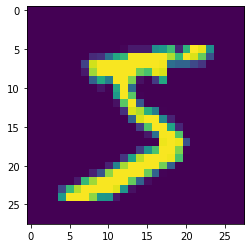

<AxesSubplot:>

In [82]:
show(pt_x_train[0])

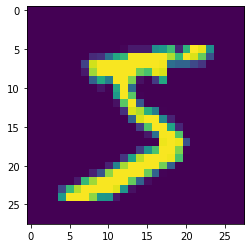

<AxesSubplot:>

In [83]:
show(tf_x_train[0])

In [84]:
np.array_equal(pt_x_train[0], tf_x_train[0])

False

In [85]:
pt_x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [90]:
flat_pt = pt_x_train[0].flatten()

In [91]:
flat_tf = tf_x_train[0].flatten()

In [104]:
for i in range(len(flat_pt)):
    if flat_pt[i] == flat_tf.astype('float32')[i]:
        print("Success")
    else:
        print("Fail")
        print(i)
        break

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [100]:
flat_pt[152]

0.011764706

In [103]:
flat_tf.astype('float32')[152]

0.011764706

In [ ]:
f